**CV model interpretation**

*_20221027_*

Check the distribution of weight magnitudes for a commonly used Computer Vision model, ResNet. Most weights have low magnitude.

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
x = model.weights

In [ ]:
y = {i: np.array(j) for i, j in enumerate(x) if len(np.array(j).shape) > 1}

In [ ]:
layers = np.concatenate([z.flatten() for z in y.values()])

Most CV model weights have low magnitude.

< examination is at level of "layers", residual connections not considered >

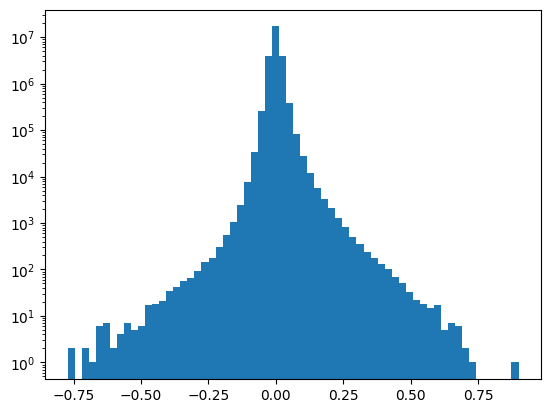

In [ ]:
plt.hist(layers, bins=64, log=True);

*_20221028_*

In [ ]:
from scipy import stats

In [ ]:
print("\t".join(["layer\t", "min-max", "\tmean", "std-dev", "Shapiro Test p-val"]))
for i in y.keys():
  j = stats.describe(y[i].flatten())
  jMM = j.minmax
  jMu = j.mean
  jVar = j.variance
  jStd = np.sqrt(jVar)
  try: pVal = stats.normaltest(y[i].flatten())[1]
  # try: pVal = stats.shapiro(y[i].flatten())[1]
  except: pVal = "NaN"
  # print("\t".join([str(np.round(z, 4)) for z in [i, jMM, jMu, jStd, pVal]]))
  print("\t".join([str(z) for z in [i, jMM, jMu, jStd, pVal]]))

layer		min-max		mean	std-dev	Shapiro Test p-val
0	(-0.6710244, 0.70432377)	-0.00048973627	0.11112492979107189	2.166842707500425e-266
6	(-0.71749574, 0.39218578)	-0.006269058	0.0714554509041381	0.0
12	(-0.39004025, 0.36375886)	0.0007938121	0.030345860073816105	0.0
18	(-0.7719803, 0.9003668)	-0.002772785	0.05548916736841325	0.0
20	(-0.39744213, 0.34759417)	0.00033807015	0.03955820160116683	0.0
30	(-0.29685766, 0.22034934)	-0.0009935484	0.03447586408176016	1.5230225048627384e-293
36	(-0.24012612, 0.31828755)	-0.0004854954	0.03222689304211972	0.0
42	(-0.24024516, 0.27957112)	-0.0009927782	0.037278762214420384	0.0
48	(-0.20992728, 0.26370996)	-0.0010522336	0.03510772019909504	5.547211506126192e-181
54	(-0.21795435, 0.20133185)	3.229044e-05	0.03165587677409118	1.5773001404843398e-298
60	(-0.2752192, 0.34998363)	-0.0030688355	0.03599943768501037	0.0
66	(-0.3339351, 0.3003353)	-0.0011888891	0.03017768451213806	0.0
72	(-0.38369384, 0.37667438)	-0.00046391445	0.022407641489033868	0.0
78	(-0.4659

Quick check of per-layer stats suggests post-trained ResNet weights are not normally distributed. Weights were / are certainly not uniformly distributed either. Said differently, model learning apportions more  magnitude to weights that are relevant as opposed to those that are not.

**20221029**

Weight distrib for a random init new model

In [ ]:
model = ResNet50(weights=None)

In [ ]:
x = model.weights

In [ ]:
y = {i: np.array(j) for i, j in enumerate(x) if len(np.array(j).shape) > 1}

In [ ]:
layers = np.concatenate([z.flatten() for z in y.values()])

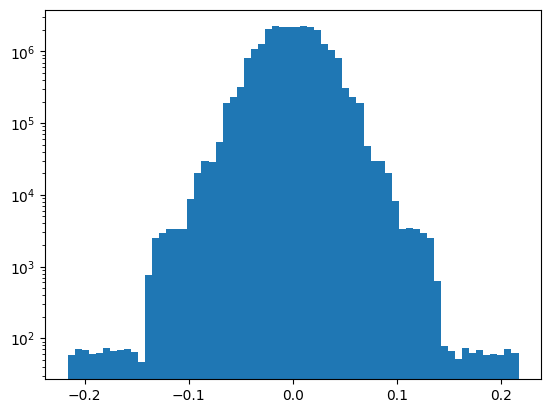

In [ ]:
plt.hist(layers, bins=64, log=True);

In [ ]:
print("\t".join(["layer", "min-max\t", "mean", "kurtosis"]))
for i in y.keys():
  j = stats.describe(y[i].flatten())
  jMM = j.minmax
  jMu = j.mean
  jKur = j.kurtosis
  try: pVal = stats.shapiro(y[i].flatten())[1]
  except: pVal = "NaN"
  print("\t".join([str(z) for z in [i, jMM, jMu, jKur]]))

layer	min-max		mean	kurtosis
0	(-0.042732563, 0.042732555)	-0.00048268115	-1.2059370813831665
6	(-0.21619394, 0.21645056)	-0.000708026	-1.2008941925708507
12	(-0.072164536, 0.07215518)	6.725714e-05	-1.2018415674096137
18	(-0.13692228, 0.136895)	0.0006889403	-1.211752623873729
20	(-0.13692763, 0.13690227)	0.00036975736	-1.191157523613031
30	(-0.1369276, 0.13691708)	-0.00021418929	-1.192841934773792
36	(-0.07216844, 0.07216509)	-0.0006126773	-1.2007464825435687
42	(-0.13691664, 0.13691002)	0.0001927116	-1.2045271633412256
48	(-0.13692336, 0.13691786)	0.000497467	-1.217915403376045
54	(-0.072158426, 0.07216442)	-7.8597375e-05	-1.1985131384433352
60	(-0.1369075, 0.13692251)	-0.0008562425	-1.201936173346915
66	(-0.124993086, 0.12499699)	3.2399126e-05	-1.2031732616008664
72	(-0.051030308, 0.051030368)	0.00013852713	-1.2007189043658135


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


78	(-0.08838689, 0.08838671)	-0.00020860703	-1.1950844427538625
80	(-0.096820936, 0.09682219)	0.00040882843	-1.1975481022015926
90	(-0.09681399, 0.09682043)	0.00022359952	-1.1977607677797275
96	(-0.051030662, 0.051030807)	0.000108709995	-1.1981568531823121
102	(-0.096824035, 0.09682299)	5.822252e-05	-1.1963507986223147
108	(-0.096821055, 0.09682332)	3.0563533e-05	-1.2042836900978435
114	(-0.051027764, 0.05103094)	5.7118912e-05	-1.1970942296587863
120	(-0.096820705, 0.09681545)	0.00032526057	-1.2055137751472282
126	(-0.09682309, 0.09682454)	0.00033001683	-1.2004182417268485
132	(-0.05103054, 0.05103089)	6.1026625e-05	-1.198789692939357
138	(-0.096821606, 0.09682034)	0.0006384503	-1.1948853317459682
144	(-0.088386826, 0.08838739)	1.1923362e-05	-1.1968329882992643
150	(-0.036084246, 0.036084384)	-3.799927e-05	-1.2004358012675087
156	(-0.062499925, 0.06249997)	-8.748573e-06	-1.1991753808840202
158	(-0.068464, 0.06846477)	-4.4252156e-05	-1.1980737295804913
168	(-0.06846443, 0.06846528)	-2.2

even though keras docs define weight init as normal distrib, ```stats.shapiro``` and ```stats.normaltest``` suggest otherwise, therefore p-val here is not informative

next, checking min max (aka weight apportionment)

kurtosis of the trained ```resnet50(weights='imagenet')``` model?

In [ ]:
print("\t".join(["layer", "min-max\t", "mean", "kurtosis"]))
for i in y.keys():
  j = stats.describe(y[i].flatten())
  jMM = j.minmax
  jMu = j.mean
  jKur = j.kurtosis
  try: pVal = stats.shapiro(y[i].flatten())[1]
  except: pVal = "NaN"
  print("\t".join([str(z) for z in [i, jMM, jMu, jKur]]))

layer	min-max		mean	kurtosis
0	(-0.042732563, 0.042732555)	-0.00048268115	-1.2059370813831665
6	(-0.21619394, 0.21645056)	-0.000708026	-1.2008941925708507
12	(-0.072164536, 0.07215518)	6.725714e-05	-1.2018415674096137
18	(-0.13692228, 0.136895)	0.0006889403	-1.211752623873729
20	(-0.13692763, 0.13690227)	0.00036975736	-1.191157523613031
30	(-0.1369276, 0.13691708)	-0.00021418929	-1.192841934773792
36	(-0.07216844, 0.07216509)	-0.0006126773	-1.2007464825435687
42	(-0.13691664, 0.13691002)	0.0001927116	-1.2045271633412256
48	(-0.13692336, 0.13691786)	0.000497467	-1.217915403376045
54	(-0.072158426, 0.07216442)	-7.8597375e-05	-1.1985131384433352
60	(-0.1369075, 0.13692251)	-0.0008562425	-1.201936173346915
66	(-0.124993086, 0.12499699)	3.2399126e-05	-1.2031732616008664
72	(-0.051030308, 0.051030368)	0.00013852713	-1.2007189043658135


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


78	(-0.08838689, 0.08838671)	-0.00020860703	-1.1950844427538625
80	(-0.096820936, 0.09682219)	0.00040882843	-1.1975481022015926
90	(-0.09681399, 0.09682043)	0.00022359952	-1.1977607677797275
96	(-0.051030662, 0.051030807)	0.000108709995	-1.1981568531823121
102	(-0.096824035, 0.09682299)	5.822252e-05	-1.1963507986223147
108	(-0.096821055, 0.09682332)	3.0563533e-05	-1.2042836900978435
114	(-0.051027764, 0.05103094)	5.7118912e-05	-1.1970942296587863
120	(-0.096820705, 0.09681545)	0.00032526057	-1.2055137751472282
126	(-0.09682309, 0.09682454)	0.00033001683	-1.2004182417268485
132	(-0.05103054, 0.05103089)	6.1026625e-05	-1.198789692939357
138	(-0.096821606, 0.09682034)	0.0006384503	-1.1948853317459682
144	(-0.088386826, 0.08838739)	1.1923362e-05	-1.1968329882992643
150	(-0.036084246, 0.036084384)	-3.799927e-05	-1.2004358012675087
156	(-0.062499925, 0.06249997)	-8.748573e-06	-1.1991753808840202
158	(-0.068464, 0.06846477)	-4.4252156e-05	-1.1980737295804913
168	(-0.06846443, 0.06846528)	-2.2

---

**20221103**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle
import numpy as np
from google.colab import drive

In [ ]:
model = ResNet50(weights=None)
prior = model.weights

In [ ]:
model = ResNet50(weights="imagenet")
post = model.weights

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
priorC = "#D23BED"
postC = "#CFC40C"

In [ ]:
prior_l = {i: np.array(j) for i, j in enumerate(prior) if len(np.array(j).shape) > 1}
prior_val = np.concatenate([x.flatten() for x in prior_l.values()])
post_l = {i: np.array(j) for i, j in enumerate(post) if len(np.array(j).shape) > 1}
post_val = np.concatenate([x.flatten() for x in post_l.values()])

- post trained resnet50 exhibits wide-tailed distributed weights as compared to untrained model

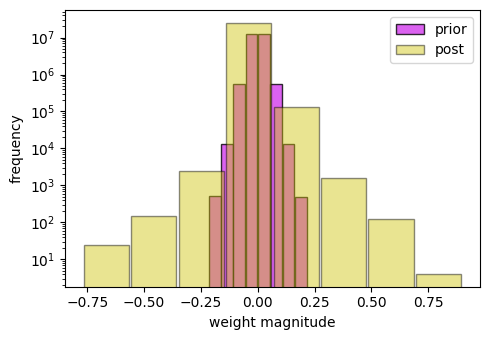

In [ ]:
_hist = {"bins": 8, "log": True, "rwidth": 0.95, "edgecolor": "k"}
F, A = plt.subplots(1, 1, figsize=(5, 3.5))
A.hist(prior_val, color=priorC, label="prior", **_hist, alpha=0.8)
A.hist(post_val, color=postC, label="post", **_hist, alpha=0.45)
A.set_xlabel("weight magnitude")
A.set_ylabel("frequency")
A.legend()
plt.tight_layout()
# plt.savefig("/gdrive/My Drive/__SRC/ResNet50_all_weights_prior_post.jpeg")
plt.show()

In [ ]:
# prior
prior_stats = {i: [] for i in prior_l.keys()}
for i, l in prior_l.items():
  desc = stats.describe(l.flatten())
  prior_stats[i].append(list(desc.minmax)+[desc.kurtosis])
_prior = np.concatenate(list(prior_stats.values())).T
prior_min, prior_max, prior_kur = _prior[0], _prior[1], _prior[2]
prior_mass = np.array([np.abs(x).sum() for x in prior_l.values()])
# post
post_stats = {i: [] for i in post_l.keys()}
for i, l in post_l.items():
  desc = stats.describe(l.flatten())
  post_stats[i].append(list(desc.minmax)+[desc.kurtosis])
_post = np.concatenate(list(post_stats.values())).T
post_min, post_max, post_kur = _post[0], _post[1], _post[2]
post_mass = np.array([np.abs(x).sum() for x in post_l.values()])

- per-layer resnet50 meta stats: weight is reapportioned in post-trained model to connections that are relevant

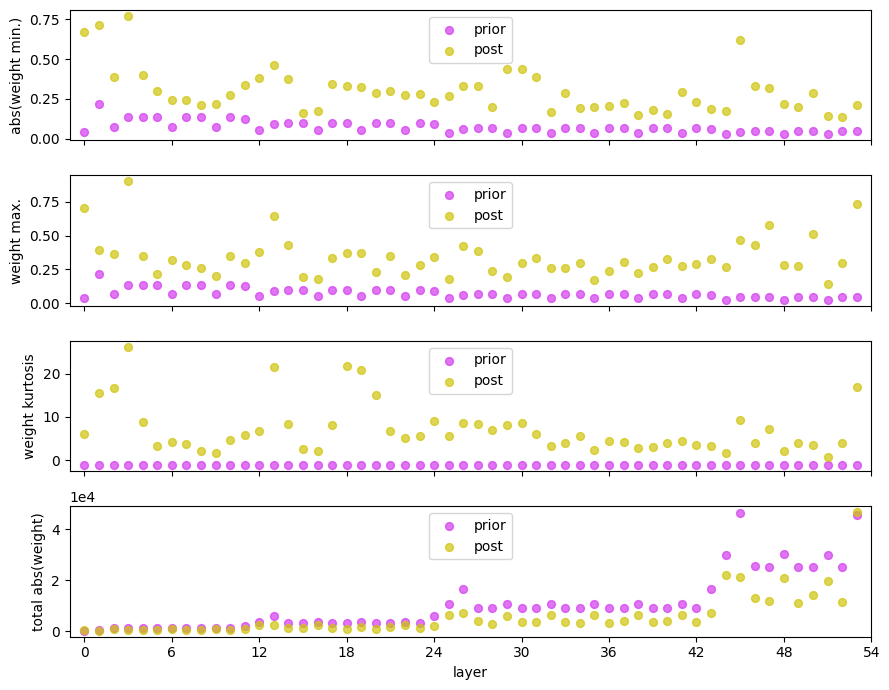

In [ ]:
_plot = {"alpha": 0.7, "s": 32}
x_axis = np.arange(len(prior_l))
F, A = plt.subplots(4, 1, sharex=True, figsize=(9, 7))
A[0].scatter(x_axis, abs(prior_min), color=priorC, label="prior", **_plot)
A[0].scatter(x_axis, abs(post_min), color=postC, label="post", **_plot)
A[0].set_ylabel("abs(weight min.)")
A[0].legend(loc=9)
A[1].scatter(x_axis, prior_max, color=priorC, label="prior", **_plot)
A[1].scatter(x_axis, post_max, color=postC, label="post", **_plot)
A[1].set_ylabel("weight max.")
A[1].legend(loc=9)
A[2].scatter(x_axis, prior_kur, color=priorC, label="prior", **_plot)
A[2].scatter(x_axis, post_kur, color=postC, label="post", **_plot)
A[2].set_ylabel("weight kurtosis")
A[2].legend(loc=9)
A[3].scatter(x_axis, prior_mass, color=priorC, label="prior", **_plot)
A[3].scatter(x_axis, post_mass, color=postC, label="post", **_plot)
A[3].set_ylabel("total abs(weight)")
A[3].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
A[3].legend(loc=9)
A[3].set_xlim([-1, len(prior_min)])
A[3].set_xticks(np.arange(0, 60, 6))
A[3].set_xlabel("layer")
plt.tight_layout()
# plt.savefig("resnet50_meta_stats.jpeg", dpi=1024)
plt.show();

weights prior --> post: greater magnitude, sparser, fat-tailed distrib, overall reduction in mass